In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import cufflinks as cf
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio

In [25]:
#color of plots
c  = ['indianred']

In [26]:
police = pd.read_csv("police_deaths_in_america.csv")
police.head()

,Rank,Name,Cause_of_Death,Date,Year,Month,Day,Department,State,K9_Unit
0,Constable,Darius Quimby,Stabbed,"Monday, January 3, 1791",1791,January,Monday,"Albany County Constable's Office, NY",New York,0
1,Sheriff,Cornelius Hogeboom,Gunfire,"Saturday, October 22, 1791",1791,October,Saturday,"Columbia County Sheriff's Office, NY",New York,0
2,Deputy Sheriff,Isaac Smith,Gunfire,"Thursday, May 17, 1792",1792,May,Thursday,"Westchester County Sheriff's Department, NY",New York,0
3,Marshal,Robert Forsyth,Gunfire,"Saturday, January 11, 1794",1794,January,Saturday,United States Department of Justice - United S...,United States,0
4,Deputy Sheriff,Robert Berwick,Gunfire,"Thursday, June 29, 1797",1797,June,Thursday,"New York County Sheriff's Office, NY",New York,0


In [27]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            26269 non-null  object
 1   Name            26269 non-null  object
 2   Cause_of_Death  26269 non-null  object
 3   Date            26269 non-null  object
 4   Year            26269 non-null  int64 
 5   Month           26269 non-null  object
 6   Day             26269 non-null  object
 7   Department      26269 non-null  object
 8   State           26269 non-null  object
 9   K9_Unit         26269 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 2.0+ MB


In [28]:
# Change to datetime
police['Date'] = pd.to_datetime(police['Date'])

police['Department'] = police['Department'].astype('category')
police['Cause_of_Death'] = police['Cause_of_Death'].astype('category')
police['Rank'] = police['Rank'].astype('category')
police['State'] = police['State'].astype('category')
police['Year'] = police['Year'].astype('int')

In [29]:
police['Department'].value_counts()

New York City Police Department, NY                                         964
Chicago Police Department, IL                                               523
Puerto Rico Police Department, PR                                           358
Philadelphia Police Department, PA                                          320
United States Department of Justice - United States Marshals Service, US    306
                                                                           ... 
Miami Springs Police Department, FL                                           1
Miami Township Police Department, OH                                          1
Miamisburg Police Department, OH                                              1
Middleburg Borough Police Department, PA                                      1
Lincoln Police Department, MO                                                 1
Name: Department, Length: 7307, dtype: int64

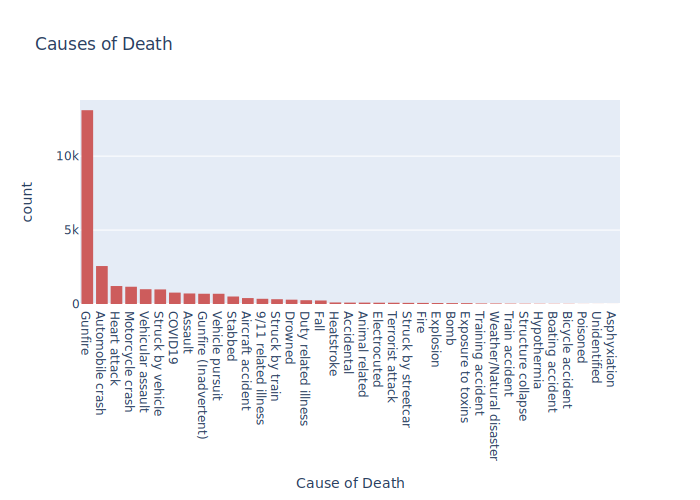

In [30]:
label1 = {'Cause_of_Death' : 'Cause of Death', 'count' : 'Count'}
fig = px.histogram(police, x = 'Cause_of_Death', title = 'Causes of Death', labels = label1, color_discrete_sequence  = c)

fig.update_xaxes(categoryorder = 'total descending')
fig.show(renderer="svg")

In [31]:
#Count the nomber of death of each rank
cause_rank = police.groupby(by = ['Cause_of_Death', 'Rank']).count()
cause_rank.reset_index(inplace = True)
cause_rank.drop(['Date', 'Year', 'Month', 'Day', 'Department', 'State', 'K9_Unit'], axis = 1, inplace = True)
cause_rank['Name'] = cause_rank['Name'].fillna('0')
cause_rank['Name'] = cause_rank['Name'].astype('int')
cause_rank.sort_values(by = 'Name', ascending = False, inplace = True)

#Select the fist 100 registers
cause_rank100 = cause_rank.iloc[:100, :]

cause_rank100 = cause_rank100.pivot(index = 'Cause_of_Death', columns = 'Rank', values = 'Name')

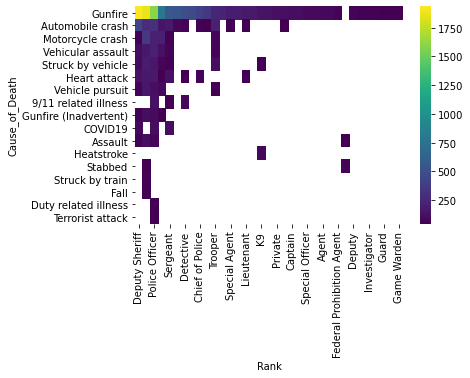

In [32]:
orig_map=plt.cm.get_cmap('viridis')
reversed_map = orig_map.reversed()
sns.heatmap(cause_rank100, cmap = 'viridis')

# The most common causes of death of the last decade

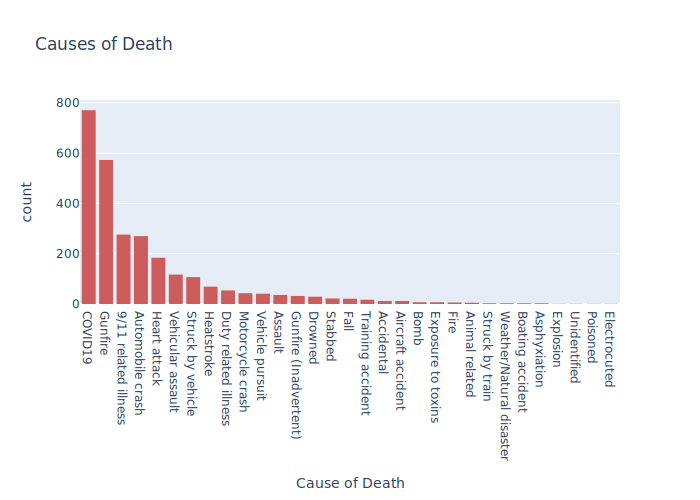

In [33]:
decade_12_22 = police.sort_values(by = 'Date')
decade_12_22 = decade_12_22[decade_12_22['Year'] >= 2012]

fig = px.histogram(decade_12_22, x = 'Cause_of_Death',  title = 'Causes of Death', labels = label1, color_discrete_sequence  = c)
fig.update_xaxes(categoryorder = 'total descending')
fig.show(renderer="svg")

# Most Dangerous States

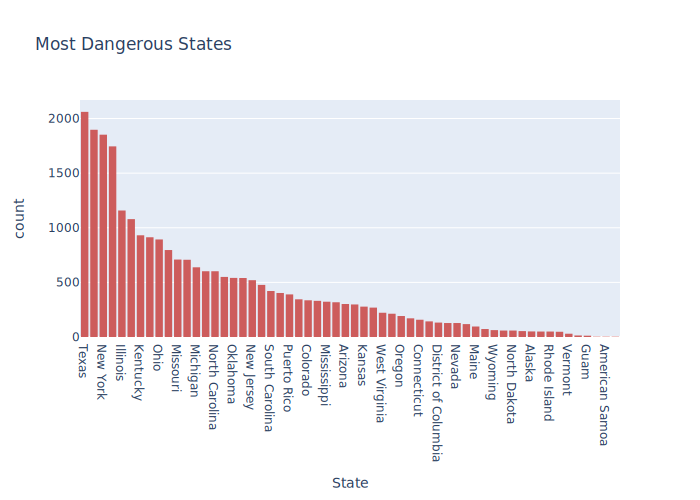

In [34]:
#We are not considering covid19 as cause of death
states = police[police['Cause_of_Death'] != 'COVID19']
fig = px.histogram(states, x = 'State', title = 'Most Dangerous States', color_discrete_sequence  = c)
fig.update_xaxes(categoryorder = 'total descending')
fig.show(renderer="svg")

# Most dangerous States of the last decade

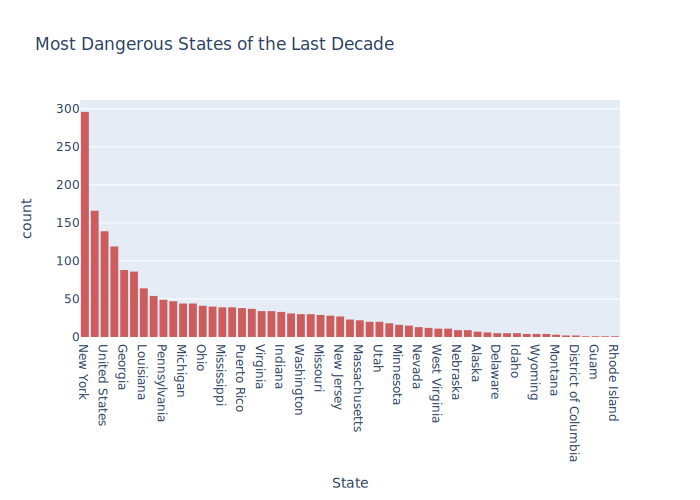

In [35]:
#We are not considering covid19 as cause of death
states_20 = police[(police['Cause_of_Death'] != 'COVID19') & (police['Year'] >= 2012)]
fig = px.histogram(states_20, x = 'State', title = 'Most Dangerous States of the Last Decade', color_discrete_sequence  = c)
fig.update_xaxes(categoryorder = 'total descending')
fig.show(renderer="svg")


# New York Departments where more polices have dead

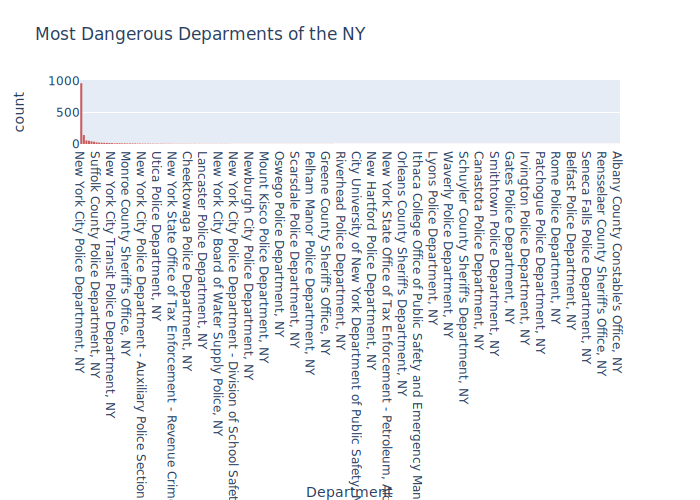

In [36]:
deparments_ny = police[police['State'] == 'New York']

fig = px.histogram(deparments_ny, x = 'Department', title = 'Most Dangerous Deparments of the NY', color_discrete_sequence  = c)
fig.update_xaxes(categoryorder = 'total descending')
fig.show(renderer="svg")


### New York  City Police Department is the most dangerous departmen of all New York City

# Relevant dates

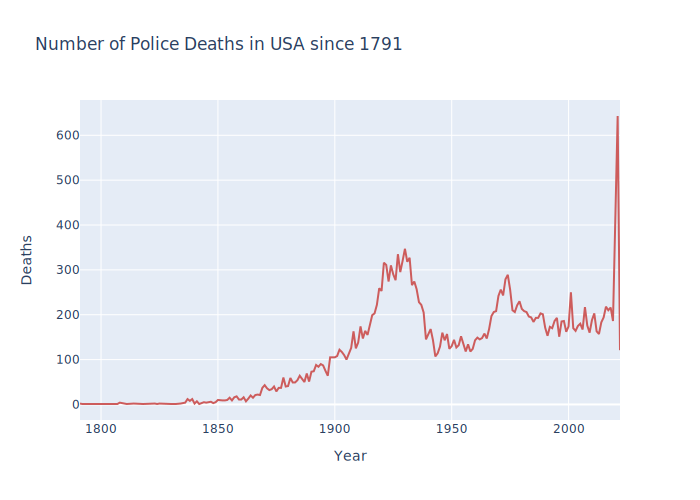

In [37]:
dates = police.sort_values(by = 'Year')
dates = dates.groupby('Year').count()
dates.reset_index(inplace = True)
dates.drop(dates.columns[2:], axis = 1, inplace = True)

labels2 = {'x' : 'Year', 'y' : 'Deaths'}
fig = px.line(x = dates['Year'], y = dates['Rank'], labels = labels2, title = 'Number of Police Deaths in USA since 1791', color_discrete_sequence = c)
fig.show(renderer="svg")


In [38]:
print(dates[dates['Year'] == 1900])

    Year  Rank
87  1900   105


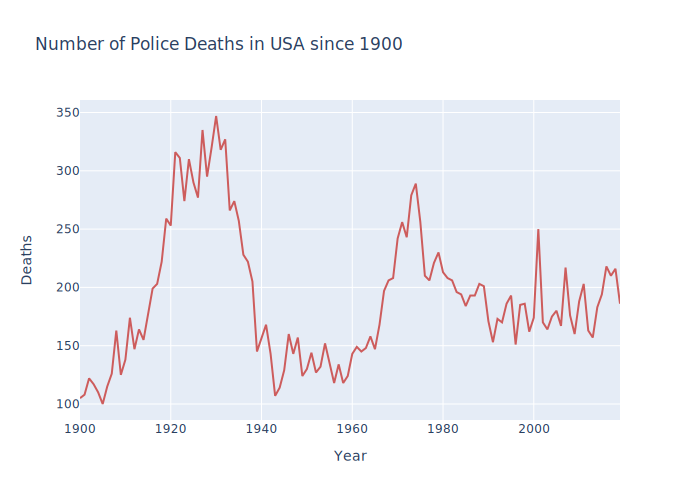

In [39]:
dates_19 = dates[87:-3]
fig = px.line(x = dates_19['Year'], y = dates_19['Rank'], labels = labels2, title = 'Number of Police Deaths in USA since 1900', color_discrete_sequence = c)
fig.show(renderer="svg")

## Loking for the States with more deaths between 1910 and 1940 and between 1960 and 1980

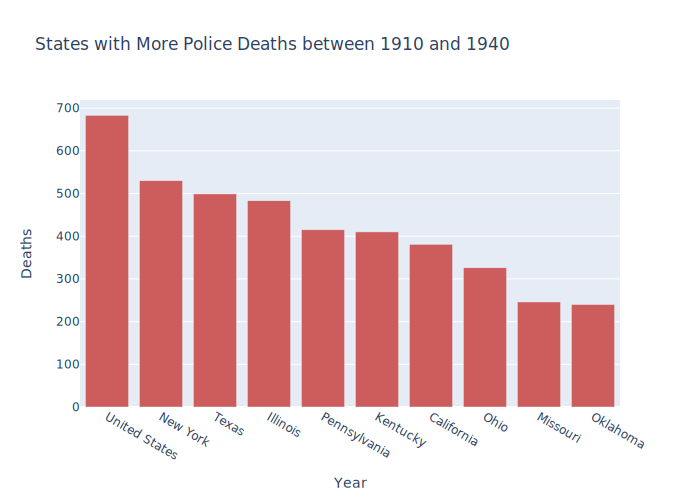

In [40]:
dates_states1 = police[(police['Year'] <= 1940) &(police['Year']>=1910)]
dates_states1 = dates_states1.groupby('State').count()
dates_states1.reset_index(inplace = True)
dates_states1.drop(['Rank', 'Name', 'Date', 'Month', 'Day', 'Department', 'K9_Unit', 'Cause_of_Death'], axis = 1, inplace = True)
dates_states1.sort_values(by = 'Year', ascending = False,inplace = True)
dates_states1 = dates_states1.head(10)

title1 = 'States with More Police Deaths between 1910 and 1940'
fig = px.bar(x = dates_states1['State'], y = dates_states1['Year'], title = title1, labels = labels2, color_discrete_sequence = c)
fig.show(renderer="svg")

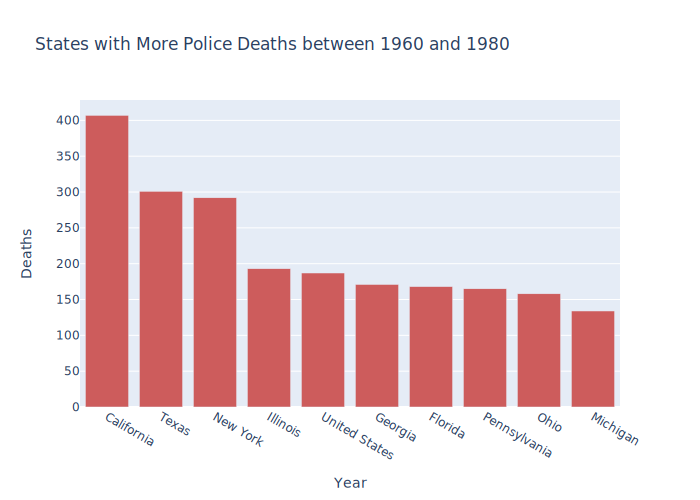

In [41]:
dates_states2 = police[(police['Year'] <= 1980) &(police['Year']>=1960)]
dates_states2 = dates_states2.groupby('State').count()
dates_states2.reset_index(inplace = True)
dates_states2.drop(['Rank', 'Name', 'Date', 'Month', 'Day', 'Department', 'K9_Unit', 'Cause_of_Death'], axis = 1, inplace = True)
dates_states2.sort_values(by = 'Year', ascending = False,inplace = True)
dates_states2 = dates_states2.head(10)

title2 = 'States with More Police Deaths between 1960 and 1980'
fig = px.bar(x = dates_states2['State'], y = dates_states2['Year'], title = title2, labels = labels2, color_discrete_sequence = c)
fig.show(renderer="svg")

### New York and Texas has been one of the most dangerous states for polices

Text(0.5, 1.0, 'Number of deaths in New York')

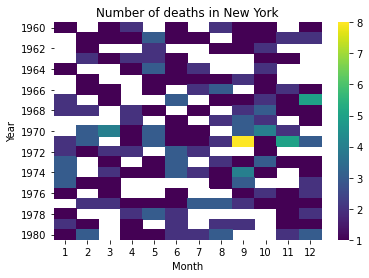

In [42]:
ny_60_80 = police[(police['Year'] <= 1980) &(police['Year']>=1960)]
ny_60_80 = ny_60_80[ny_60_80['State'] == 'New York']
ny_60_80 = ny_60_80.groupby([ny_60_80['Date'].dt.year.rename('year'), ny_60_80['Date'].dt.month.rename('month')]).count()
ny_60_80.drop(ny_60_80.columns[1:], axis = 1, inplace = True)
ny_60_80.reset_index(inplace = True)
ny_60_80.columns = ['Year', 'Month', 'Number_of_Deaths']
ny_60_80 = ny_60_80.pivot(index = 'Year', columns = 'Month', values = 'Number_of_Deaths')
ny_60_80.fillna(0)

sns.heatmap(ny_60_80, cmap = 'viridis')
plt.title('Number of deaths in New York')

# Looking for the Cause of Death most common in NY, Texas and Illinois

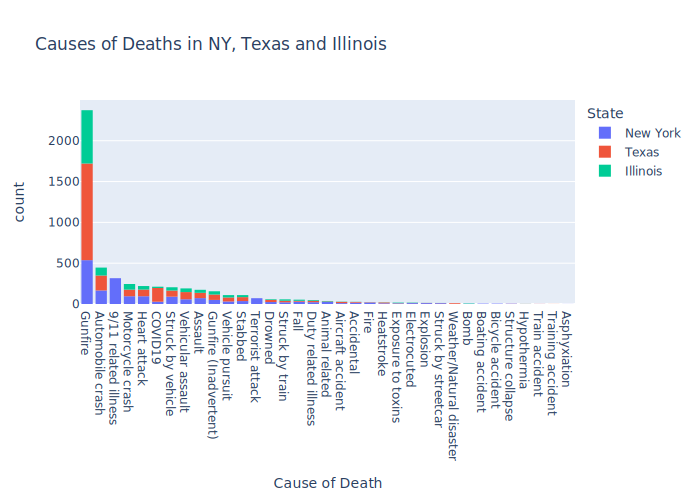

In [43]:
ny = police[police['State'].isin(['New York', 'Texas', 'Illinois'])]

fig = px.histogram(ny, x = 'Cause_of_Death', color = 'State', labels = label1, title = 'Causes of Deaths in NY, Texas and Illinois')
fig.update_xaxes(categoryorder = 'total descending')
fig.show(renderer="svg")

## Looking for times of terrorism

In [44]:
#Deaths by terrorist attack
terrorism = police[police['Cause_of_Death'] == 'Terrorist attack']
#Counting deaths for state
terrorism = terrorism.groupby(by = ['Date', 'State']).count()
terrorism.fillna(0, inplace = True)
terrorism.drop(terrorism.columns[1:], axis = 1, inplace = True)
terrorism = terrorism[terrorism['Rank'] != 0]
terrorism

Rank
Date       State              
1976-09-11 New York        1.0
1988-12-21 United States   3.0
1995-04-19 United States   8.0
2001-09-11 New York       70.0
           United States   3.0

### New York is suceptilbe to terrorist attacks 